# Importing Libraries

In [58]:
import pandas as pd 
import numpy as np
from pandasql import sqldf
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Loading DataFrame

In [2]:
# Loeading the dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)

In [3]:
# Explorting the DataFrame 
df.head(n=5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Checking DataFrame column types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# Percentage of NaN records in the DataFrame 
def nan_check(df):
    nan_count = df.isnull().sum()
    nan_percentage = df.isna().sum() / len(df) * 100
    return nan_count, nan_percentage

# Calling the function and printing the results
nan_percentages = nan_check(df)
print(nan_percentages)

(InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64, InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64)


# Data Exploration & Preprocessing

In [6]:
# Checking min/max of CustomerIDs 
customer_id_min = df['CustomerID'].min()
customer_id_max = df['CustomerID'].max()

print("Minimum CustomerID is:", customer_id_min,"Maximum CustomerID is:", customer_id_max)

Minimum CustomerID is: 12346.0 Maximum CustomerID is: 18287.0


In [7]:
# Function to generate a random number above 18287
def generate_random_id():
    return random.randint(18288, 99999)

# Applying the function to NaN values in the 'CustomerID' column
df['CustomerID'] = df['CustomerID'].apply(lambda x: generate_random_id() if pd.isna(x) else x)

# Changing the datatype to int64
df['CustomerID'] = df['CustomerID'].astype('int64')


In [8]:
def df_preprocessing(df):
    # Dropping rows from DataFrame 'df' where 'Description' column has NaN values
    # Making a copy of the DataFrame to avoid SettingWithCopyWarning
    df_processed = df.dropna(subset=['Description']).copy()

    # Converting 'InvoiceDate' to datetime format
    df_processed['InvoiceDate'] = pd.to_datetime(df_processed['InvoiceDate'])

    # Extracting year, month, and day from 'InvoiceDate' and creating new columns 'YearKey', 'MonthKey', and 'DayKey'
    df_processed['YearKey'] = df_processed['InvoiceDate'].dt.year
    df_processed['MonthKey'] = df_processed['InvoiceDate'].dt.month
    df_processed['DayKey'] = df_processed['InvoiceDate'].dt.day

    # Creating Total Amount column
    df_processed["TotalAmount"] = df_processed["Quantity"] * df_processed["UnitPrice"]

    return df_processed

# Applying the function to your DataFrame
df = df_preprocessing(df)


In [9]:
# Explorting the DataFrame 
df.head(n=5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearKey,MonthKey,DayKey,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,20.34


In [10]:
# Checking unique countries 
df["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [11]:
# Data Validation - Checking Percentage of NaN records in the DataFrame 
def nan_check(df):
    nan_count = df.isnull().sum()
    nan_percentage = df.isna().sum() / len(df) * 100
    return nan_count, nan_percentage

# Calling the function and printing the results
nan_percentages = nan_check(df)
print(nan_percentages)

(InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
YearKey        0
MonthKey       0
DayKey         0
TotalAmount    0
dtype: int64, InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
YearKey        0.0
MonthKey       0.0
DayKey         0.0
TotalAmount    0.0
dtype: float64)


# Feature Engineering - Recency, Frequency and Monetary Values (RFM Model)

In [13]:
# RFM DataFrame generation function 
def rfm(df):

    snapshot_date = max(df['InvoiceDate']) + pd.DateOffset(days=1)  # Calculating recency score

    rfm = df.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'nunique',
        'TotalAmount': 'sum',
    })

    rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'MonetaryValue'}, inplace=True)

    return rfm 


df_rfm = rfm(df)

# In the context of RFM (Recency, Frequency, Monetary value) analysis, a 'Recency' score of 2 has a specific interpretation related to customer engagement and recent activity.

# The 'Recency' metric in RFM analysis represents the number of days since the customer's last purchase. A lower 'Recency' score indicates that the customer has made a purchase more recently.

# So, if a customer has a 'Recency' score of 2 in your RFM analysis, it means:

# Recent Engagement: The customer made their last purchase just 2 days before the 'snapshot_date'. This is a very recent interaction, indicating high recent engagement with your business.
# Potential for Immediate Follow-up: Given the recent interaction, this customer might be more receptive to new offers, promotions, or products. This is an opportune time to engage them with marketing communications.
# High Priority for Retention Strategies: Customers with such recent interactions are often considered high-priority in retention strategies, as they are likely to be more responsive to customer retention efforts.
# Indicator of Loyalty or Interest: Frequent and recent purchases can be indicators of customer loyalty or a growing interest in your products or services.
# In summary, a 'Recency' score of 2 suggests that the customer is highly engaged and has recently interacted with your business, making them a prime candidate for targeted marketing or loyalty programs.

In [14]:
# Checking RFM DataFrame 
df_rfm.head(n=5)

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,326,2,0.00
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40


In [15]:
# Checking descriptive statistics for the RFM features
df_rfm.describe()

,Recency,Frequency,MonetaryValue
count,70138.000000,70138.000000,70138.000000
mean,119.852633,2.218284,138.979554
std,111.997783,2.667656,2112.878168
min,1.000000,1.000000,-17825.340000
25%,23.000000,1.000000,5.780000
50%,80.000000,2.000000,13.180000
75%,196.000000,3.000000,29.310000
max,374.000000,248.000000,279489.020000


##### Creating RFM Bins 

In [16]:
# Creating RFM bins based on quartiles - 1 to 4 range for Recency, Frequency and Monetary Values
def rfm_scores(df_rfm):
    # Calculating quartile thresholds for the 'Recency', 'Frequency', and 'MonetaryValue' columns
    quartiles_recency = df_rfm['Recency'].quantile([0.25, 0.5, 0.75, 1.0])
    quartiles_frequency = df_rfm['Frequency'].quantile([0.25, 0.5, 0.75, 1.0])
    quartiles_monetary = df_rfm['MonetaryValue'].quantile([0.25, 0.5, 0.75, 1.0])

    # Creating bins for recency, frequency, and monetary values using float('inf') for infinity
    recency_bins = [-float('inf'), quartiles_recency[0.25], quartiles_recency[0.50], quartiles_recency[0.75], float('inf')]
    frequency_bins = [-float('inf'), quartiles_frequency[0.25], quartiles_frequency[0.50], quartiles_frequency[0.75], float('inf')]
    monetary_bins = [-float('inf'), quartiles_monetary[0.25], quartiles_monetary[0.50], quartiles_monetary[0.75], float('inf')]

    # Assigning scores based on the bins
    df_rfm['R_Score'] = pd.cut(df_rfm['Recency'], bins=recency_bins, labels=[1, 2, 3, 4], include_lowest=True)
    df_rfm['F_Score'] = pd.cut(df_rfm['Frequency'], bins=frequency_bins, labels=[1, 2, 3, 4], include_lowest=True)
    df_rfm['M_Score'] = pd.cut(df_rfm['MonetaryValue'], bins=monetary_bins, labels=[1, 2, 3, 4], include_lowest=True)

    return df_rfm

# Applying the function to your DataFrame
df_rfm = rfm_scores(df_rfm)


In [17]:
# Checking new DataFrame with RFM bins 
df_rfm.head(n=5)

,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score
CustomerID,,,,,,
12346,326,2,0.00,4,2,1
12347,2,7,4310.00,1,4,4
12348,75,4,1797.24,2,4,4
12349,19,1,1757.55,1,1,4
12350,310,1,334.40,4,1,4


In [18]:
# Checking quartiles - Recency (R)
df_rfm['Recency'].quantile([0.25, 0.5, 0.75, 1.0])

0.25     23.0
0.50     80.0
0.75    196.0
1.00    374.0
Name: Recency, dtype: float64

In [19]:
# Checking quartiles - Frequency (F)
df_rfm['Frequency'].quantile([0.25, 0.5, 0.75, 1.0])

0.25      1.0
0.50      2.0
0.75      3.0
1.00    248.0
Name: Frequency, dtype: float64

In [20]:
# Checking quartiles - MonetaryValue (M)
df_rfm['MonetaryValue'].quantile([0.25, 0.5, 0.75, 1.0])

0.25         5.78
0.50        13.18
0.75        29.31
1.00    279489.02
Name: MonetaryValue, dtype: float64

# Exploratory Data Analysis - RFM Segments

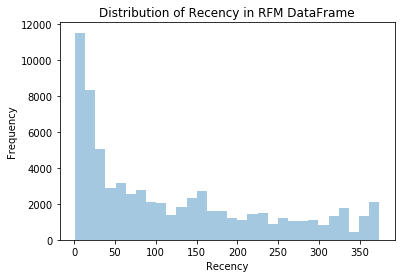

In [38]:
# Creating a histogram using seaborn to visualize the distribution of 'Recency'
# If histplot is not available, using distplot
sns.distplot(df_rfm['Recency'], bins=30, kde=False)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Distribution of Recency in RFM DataFrame')

plt.show()


# Unsupervised Learning - K Means Clustering

In [66]:
# Storing the RFM features in a list for K-Means

X = df_rfm[['R_Score', 'F_Score', 'M_Score']]

In [67]:
X 

,R_Score,F_Score,M_Score
CustomerID,,,
12346,4,2,1
12347,1,4,4
12348,2,4,4
12349,1,1,4
12350,4,1,4
...,...,...,...
99995,3,3,2
99996,4,1,2
99997,4,1,2


In [62]:
# Calculate inertia (sum of squared distances) for different values of k
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init= 10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

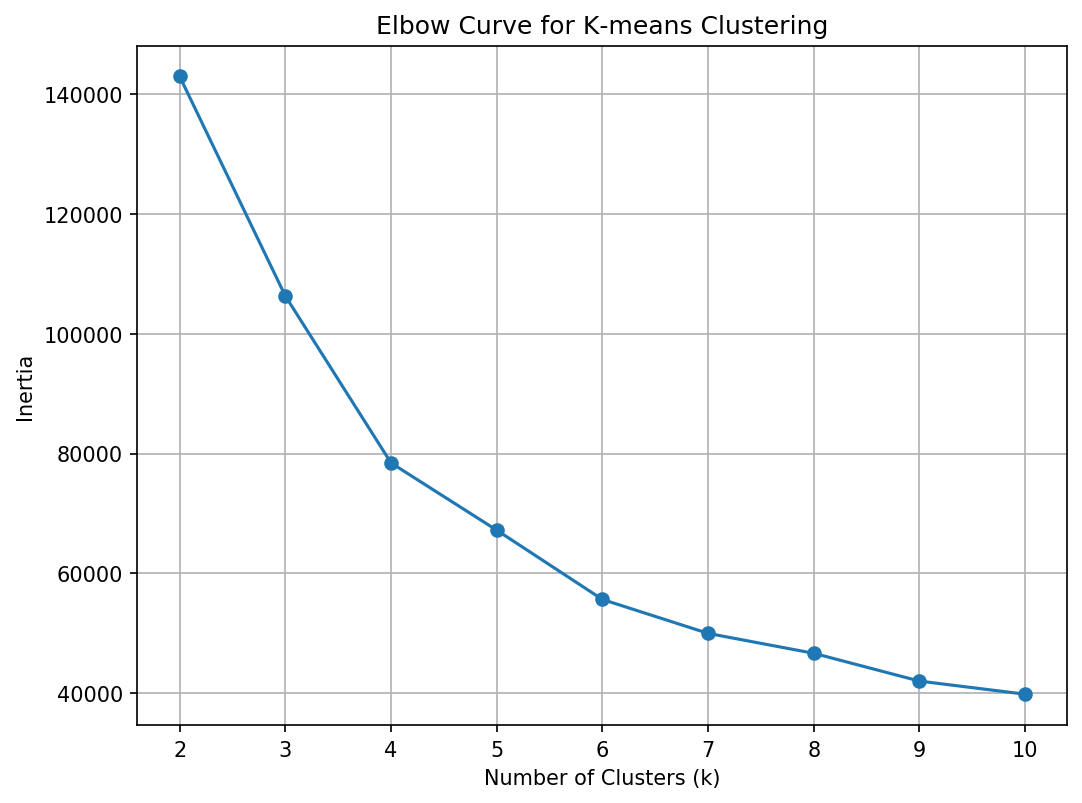

In [68]:
# Plot the elbow curve
plt.figure(figsize=(8, 6),dpi=150)
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')
plt.grid(True)
plt.show()

# Optimal number is clusters is k=4 

In [69]:
# Perform K-means clustering with best K
clusters_kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
df_rfm['Cluster'] = clusters_kmeans.fit_predict(X)

In [70]:
df_rfm

,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,Cluster
CustomerID,,,,,,,
12346,326,2,0.00,4,2,1,0
12347,2,7,4310.00,1,4,4,3
12348,75,4,1797.24,2,4,4,3
12349,19,1,1757.55,1,1,4,1
12350,310,1,334.40,4,1,4,2
...,...,...,...,...,...,...,...
99995,176,3,6.66,3,3,2,2
99996,369,1,10.08,4,1,2,0
99997,324,1,5.81,4,1,2,0


In [77]:
# Interpreting Clustrers 

# Assuming 'Cluster', 'R_Score', 'F_Score', and 'M_Score' are columns in df_rfm
# Convert categorical scores to numerical if they are not already
df_rfm['R_Score'] = df_rfm['R_Score'].astype(int)
df_rfm['F_Score'] = df_rfm['F_Score'].astype(int)
df_rfm['M_Score'] = df_rfm['M_Score'].astype(int)

# Group by cluster and calculate mean values
cluster_summary = df_rfm.groupby('Cluster').agg({
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean'
}).reset_index()

print(cluster_summary)

   Cluster   R_Score   F_Score   M_Score
0        0  3.569172  1.289384  1.434175
1        1  1.510507  1.679257  1.968665
2        2  3.262954  1.971206  3.437164
3        3  1.520664  3.441937  3.597173


## RFM Cluster Interpretation

Here's how to interpret each cluster based on the RFM scoring approach:

### Cluster 0
Customers in this cluster have a **high Recency score** (average of 3.57), which means they haven't purchased recently. They also have lower Frequency and Monetary scores (averages of 1.29 and 1.43 respectively), indicating they shop infrequently and spend less. This group might consist of lapsed or low-value customers.

### Cluster 1
This group has the **lowest Recency score** (average of 1.51), indicating they have purchased very recently. However, their Frequency score is relatively low (average of 1.68), and their Monetary score is moderate (average of 1.97). These could be new or occasional customers who have just made a purchase.

### Cluster 2
Customers here have a **moderately high Recency score** (average of 3.26) and the **highest Monetary score** (average of 3.44) compared to other clusters, but their Frequency is not the highest (average of 1.97). This cluster might represent high-spending customers, but they don't purchase very often, possibly making large purchases each time they shop.

### Cluster 3
This cluster has customers with a **low Recency score** (average of 1.52) similar to Cluster 1, indicating they also made purchases recently. They have the **highest Frequency** (average of 3.44) and Monetary scores (average of 3.60) amongst all clusters, suggesting these are your most valuable customers who shop often and spend the most.

## Strategic Marketing Strategies

For strategic marketing purposes, here are some potential strategies:

- **Cluster 0**: Re-engagement campaigns, incentives to renew their interest, or exploring why they've lapsed.
- **Cluster 1**: Welcome campaigns, customer education to encourage repeat purchases, or feedback requests to learn more about their recent experience.
- **Cluster 2**: Personalized incentives to increase purchase frequency, exclusive offers to maintain their high spending patterns.
- **Cluster 3**: Loyalty programs, up-sell and cross-sell opportunities, personalized communications to maintain and enhance their relationship with the brand.

These interpretations and strategies should be further refined by considering the actual values and scales used in the RFM scoring system, as well as the business context and customer behavior nuances.